In [1]:
from essi21 import mixing as mm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({
    'figure.figsize': (6, 4),
    'figure.facecolor': 'white',
    'xtick.top': True,
    'xtick.direction': 'in',
    'ytick.right': True,
    'ytick.direction': 'in',
    'axes.grid': True
})

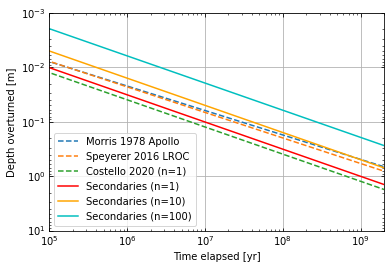

In [2]:
# See figure 4 Costello (2020)
plt.figure()
time_arr = np.logspace(3, 10)

# Apollo sample control group (plotted as line rather than points)
od_morris = mm.overturn_depth_morris(time_arr)
plt.loglog(time_arr, od_morris, '--', label='Morris 1978 Apollo')

# LRO observation control group (plotted as line rather than points)
od_speyerer = mm.overturn_depth_speyerer(time_arr)
plt.loglog(time_arr, od_speyerer, '--', label='Speyerer 2016 LROC')

# Costello reported strength regime equation
od_costello_str = mm.overturn_depth_costello_str(time_arr)
plt.loglog(time_arr, od_costello_str, '--', label='Costello 2020 (n=1)')

# Set up overturn for secondaries, 99% probability
prob_pct = '99%'
regime = 'secondary'
a, b = mm.OVERTURN_AB[regime]
vf = mm.IMPACT_SPEEDS[regime]
u = mm.overturn_u(a, b, 'strength', vf=vf)

# Plot 1, 10, 100 overturns
for n_overturns, c in zip((1, 10, 100), ('r', 'orange', 'c')):
    depth = mm.overturn_depth(time_arr, u, b, n_overturns, prob_pct)
    plt.loglog(time_arr, depth, c=c, label=f'Secondaries (n={n_overturns})')

plt.ylim(10, 1e-3)
plt.xlim(1e5, 2e9)
plt.xlabel('Time elapsed [yr]')
plt.ylabel('Depth overturned [m]')
plt.legend()

plt.savefig('/home/cjtu/projects/essi21/figs/overturn_number_test.png', 
            bbox_inches='tight', dpi=300)
plt.show()

1.1103803170407296e-05
1.5700973100042665e-05


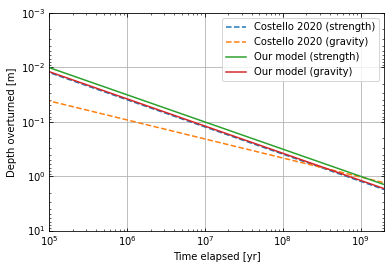

In [3]:
# Test Equation 14, Costello (2020)
plt.figure()
time_arr = np.logspace(3, 10)

# Costello reported strength and gravity regime equations
od_costello_str = mm.overturn_depth_costello_str(time_arr)
plt.loglog(time_arr, od_costello_str, '--', label='Costello 2020 (strength)')
od_costello_grav = mm.overturn_depth_costello_grav(time_arr)
plt.loglog(time_arr, od_costello_grav, '--', label='Costello 2020 (gravity)')

# Set up overturn for secondaries, 1 overturn, 99% probability
n_overturns = 1
prob_pct = '99%'
regime = 'secondary'
a, b = mm.OVERTURN_AB[regime]
vf = mm.IMPACT_SPEEDS[regime]

# Plot strength and gravity regimes
for regime in ('strength', 'gravity'):
    u = mm.overturn_u(a, b, regime, vf=vf)
    print(u)
    depth = mm.overturn_depth(time_arr, u, b, n_overturns, prob_pct)
    plt.loglog(time_arr, depth, label=f'Our model ({regime})')

plt.ylim(10, 1e-3)
plt.xlim(1e5, 2e9)
plt.xlabel('Time elapsed [yr]')
plt.ylabel('Depth overturned [m]')
plt.legend()

plt.savefig('/home/cjtu/projects/essi21/figs/overturn_regime_test.png', 
            bbox_inches='tight', dpi=300)
plt.show()

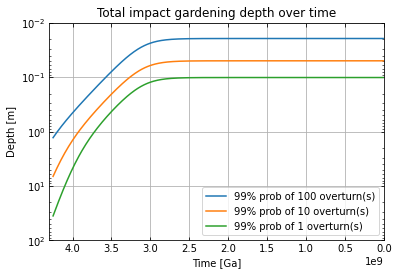

In [4]:
for n in (100, 10, 1):
    od = mm.total_overturn_depth(n_overturns=n, prob_pct='99%', mode='essi')
    plt.semilogy(mm._TIME_ARR, od, label=f'99% prob of {n} overturn(s)')
plt.title('Total impact gardening depth over time')
plt.ylim(100, 1e-2)
plt.xlim(4.3e9, 0)
plt.ylabel('Depth [m]')
plt.xlabel('Time [Ga]')
plt.legend()
plt.savefig('/home/cjtu/projects/essi21/figs/total_overturn_depth.png', 
            bbox_inches='tight', dpi=300)
plt.show()

,n,10%,50%,99%
0,1.0,0.105,0.693,4.605
1,2.0,0.530,1.678,6.638
2,3.0,1.102,2.674,8.406
3,4.0,1.742,3.672,10.050
4,6.0,3.150,5.670,13.110


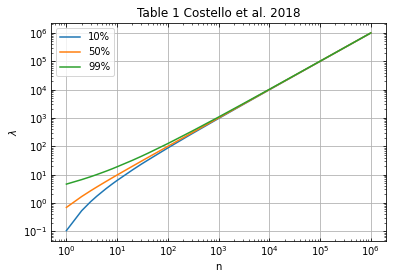

In [8]:
# Table 1 from Costello et al. (2018)
df = mm.read_lambda_table()
df.plot(x='n', logx=True, logy=True)
plt.ylabel('$\lambda$')
plt.title('Table 1 Costello et al. 2018')
df.head()